## Evaluation of the progress towards SDG goal (No.7 )


In [ ]:
# Importing the necessary libraries
%run helper.py

### View Global Shift in Electricity Generation (1985-2023)

In [7]:
df = pd.read_csv("https://ourworldindata.org/grapher/electricity-fossil-renewables-nuclear-line.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# View the first few rows of the dataframe.
print(df.head())

          Entity Code  Year  nuclear_share_of_electricity__pct  \
0  ASEAN (Ember)  NaN  2000                                0.0   
1  ASEAN (Ember)  NaN  2001                                0.0   
2  ASEAN (Ember)  NaN  2002                                0.0   
3  ASEAN (Ember)  NaN  2003                                0.0   
4  ASEAN (Ember)  NaN  2004                                0.0   

   fossil_share_of_electricity__pct  renewable_share_of_electricity__pct  
0                         80.652916                            19.347086  
1                         80.933680                            19.066320  
2                         82.335690                            17.664303  
3                         83.327515                            16.672487  
4                         84.299990                            15.700016  


In [9]:
# Data Preparation
df_world = df[df['Entity'] == 'World']
df_world = df_world[['Year', 'fossil_share_of_electricity__pct', 'renewable_share_of_electricity__pct', 'nuclear_share_of_electricity__pct']]

# View the first few rows of the dataframe.
print(df_world.head())

      Year  fossil_share_of_electricity__pct  \
7276  1985                         63.579130   
7277  1986                         63.256134   
7278  1987                         63.330498   
7279  1988                         62.816746   
7280  1989                         63.954040   

      renewable_share_of_electricity__pct  nuclear_share_of_electricity__pct  
7276                            20.817406                          15.060812  
7277                            20.545267                          15.664165  
7278                            19.913677                          16.257086  
7279                            19.683376                          16.976147  
7280                            18.829810                          16.683971  


#### Visualization on Global Shift in Electricity Generation (1985-2023)

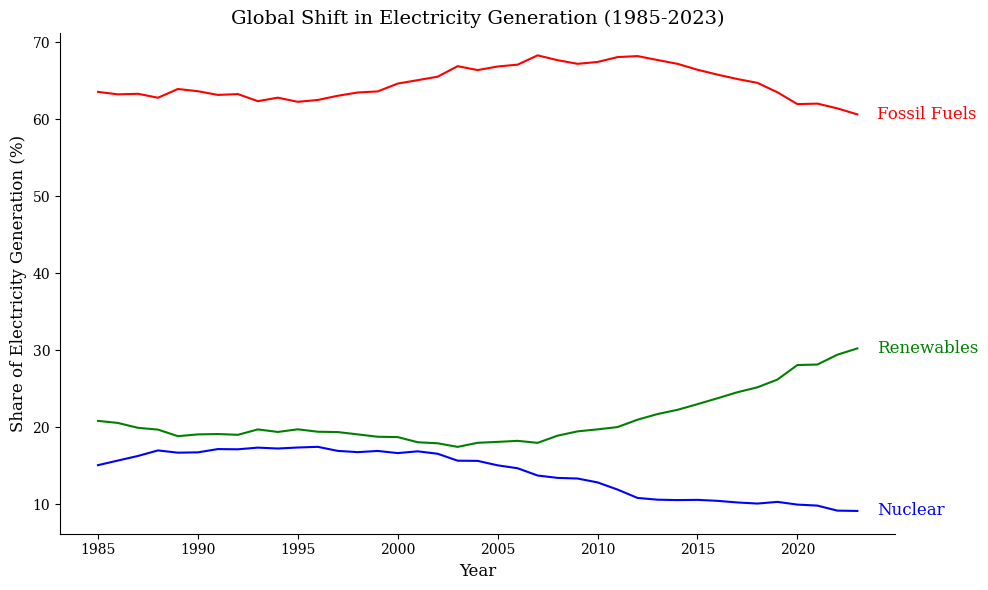

In [10]:
plt.figure(figsize=(10, 6))
df_world.set_index('Year', inplace=True)

# Plot each line
plt.plot(df_world.index, df_world['fossil_share_of_electricity__pct'], color='red', linewidth=1.5)
plt.plot(df_world.index, df_world['renewable_share_of_electricity__pct'], color='green', linewidth=1.5)
plt.plot(df_world.index, df_world['nuclear_share_of_electricity__pct'], color='blue', linewidth=1.5)

# Add labels next to the end of each line
plt.text(df_world.index[-1] + 1, df_world['fossil_share_of_electricity__pct'].iloc[-1], "Fossil Fuels", color='red', fontsize=12, verticalalignment='center')
plt.text(df_world.index[-1] + 1, df_world['renewable_share_of_electricity__pct'].iloc[-1], "Renewables", color='green', fontsize=12, verticalalignment='center')
plt.text(df_world.index[-1] + 1, df_world['nuclear_share_of_electricity__pct'].iloc[-1], "Nuclear", color='blue', fontsize=12, verticalalignment='center')

# Adjust font sizes for clarity
plt.xlabel("Year", fontsize=12)
plt.ylabel("Share of Electricity Generation (%)", fontsize=12)
plt.title("Global Shift in Electricity Generation (1985-2023)", fontsize=14)

# Remove top and left borders for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

#### Visualization on Regional Shift in Electricity Generation (1985-2023)

Using small multiples for observing regional patterns

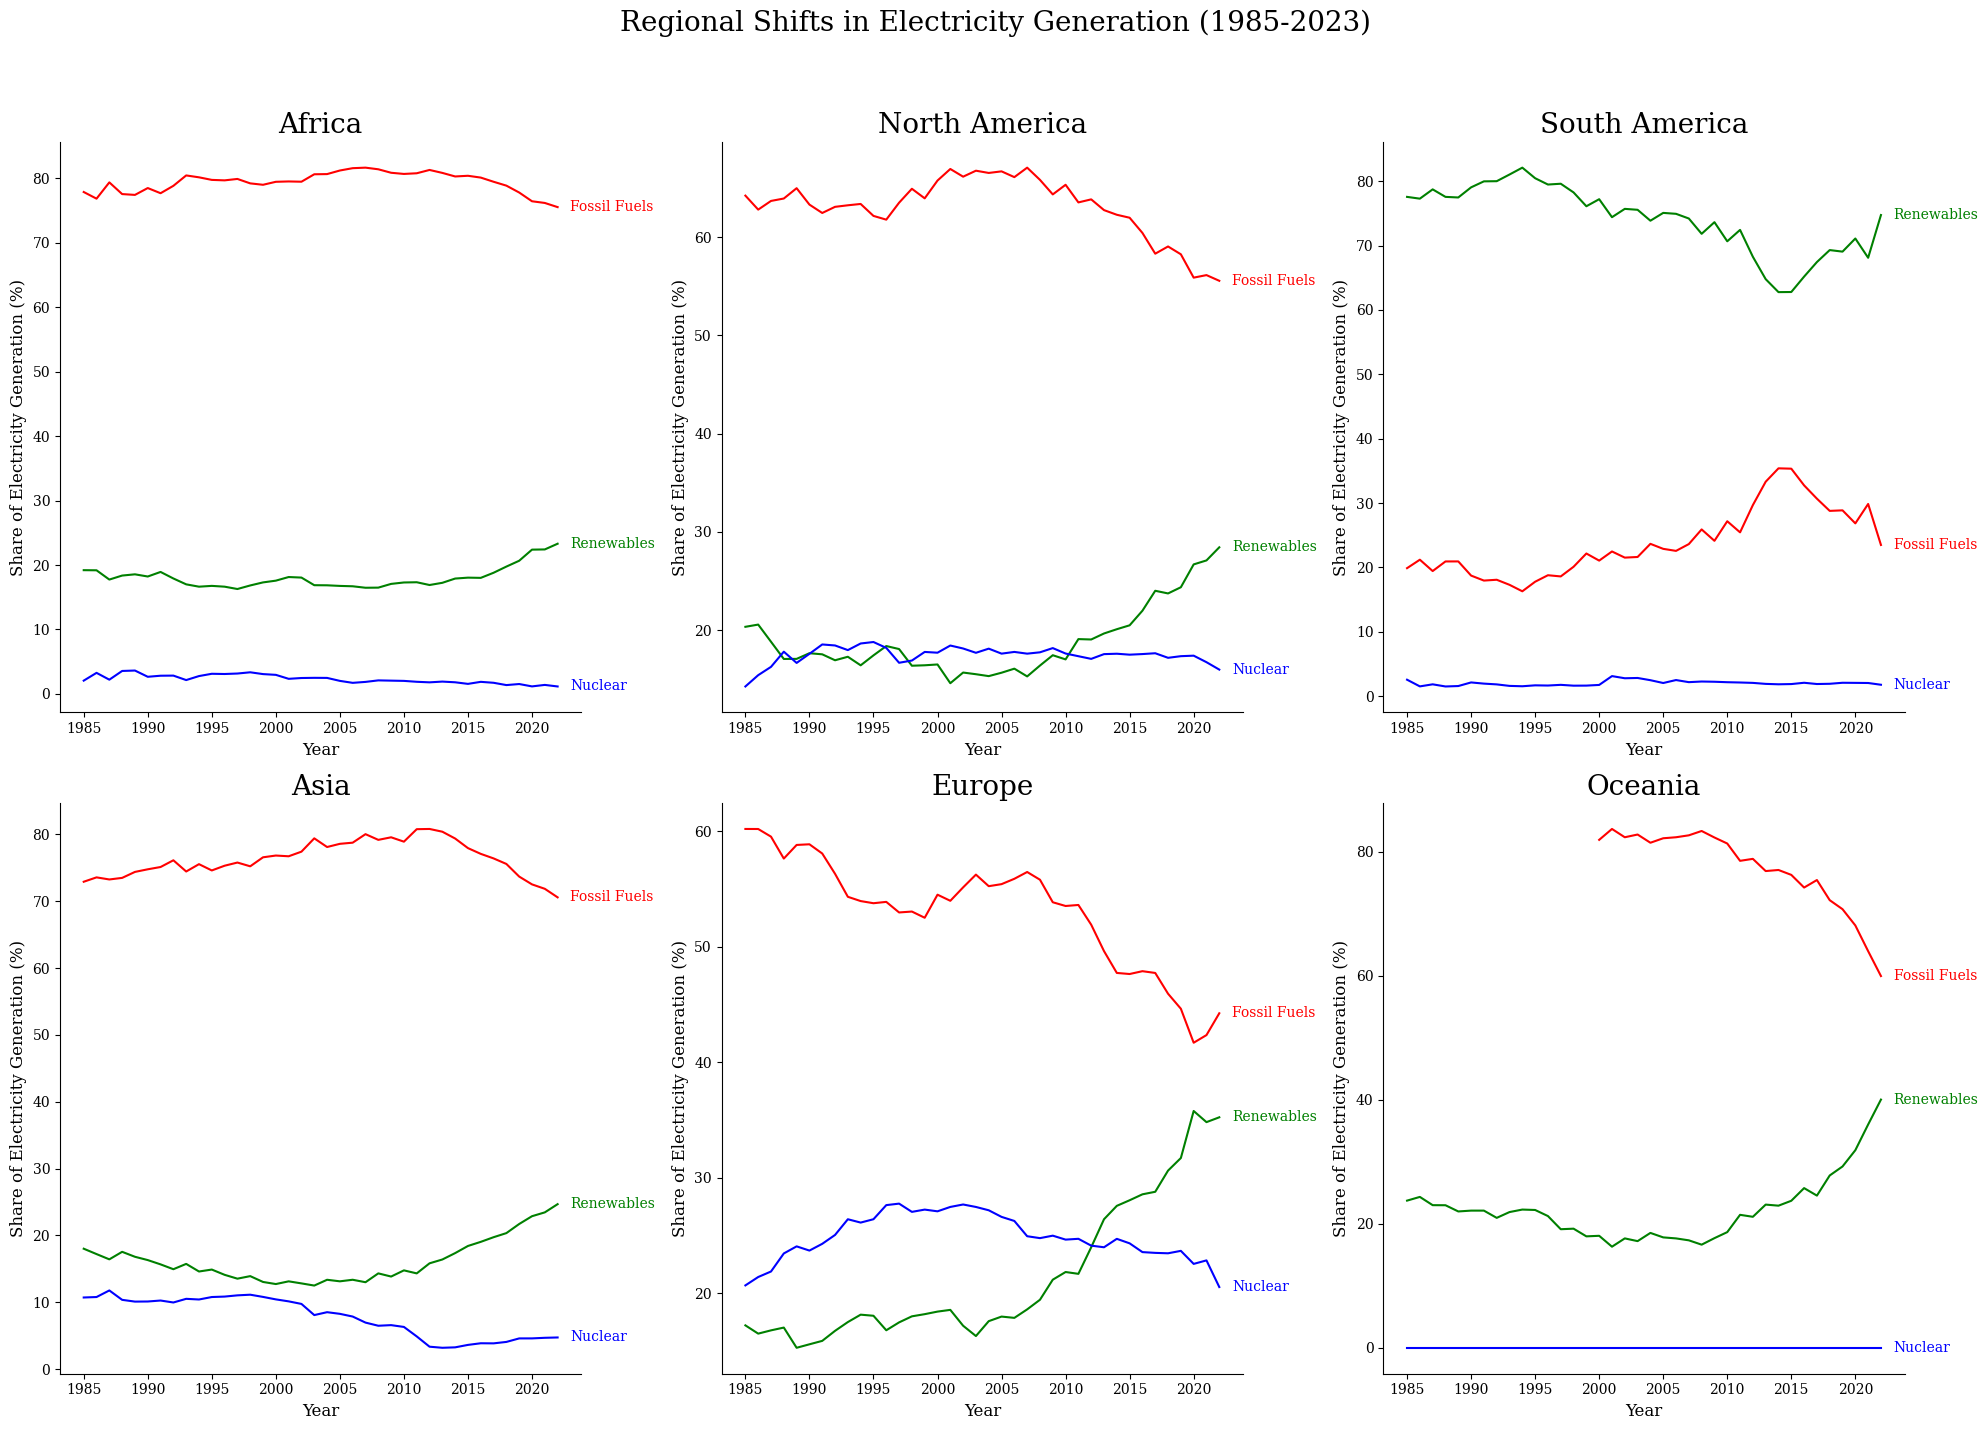

In [11]:
regions = ["Africa", "North America", "South America", "Asia", "Europe", "Oceania"]

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle("Regional Shifts in Electricity Generation (1985-2023)", fontsize=20)

axes = axes.flatten()

for i, region in enumerate(regions):
    df_region = df[df['Entity'] == region]
    
    df_region = df_region[['Year', 'fossil_share_of_electricity__pct', 
                           'renewable_share_of_electricity__pct', 
                           'nuclear_share_of_electricity__pct']]
    
    # Set Year as the index
    df_region.set_index('Year', inplace=True)
    
    # Plot each line for the region
    axes[i].plot(df_region.index, df_region['fossil_share_of_electricity__pct'], color='red', linewidth=1.5)
    axes[i].plot(df_region.index, df_region['renewable_share_of_electricity__pct'], color='green', linewidth=1.5)
    axes[i].plot(df_region.index, df_region['nuclear_share_of_electricity__pct'], color='blue', linewidth=1.5)
    
    # Add labels next to the end of each line
    axes[i].text(df_region.index[-1] + 1, df_region['fossil_share_of_electricity__pct'].iloc[-1], "Fossil Fuels", color='red', fontsize=10, verticalalignment='center')
    axes[i].text(df_region.index[-1] + 1, df_region['renewable_share_of_electricity__pct'].iloc[-1], "Renewables", color='green', fontsize=10, verticalalignment='center')
    axes[i].text(df_region.index[-1] + 1, df_region['nuclear_share_of_electricity__pct'].iloc[-1], "Nuclear", color='blue', fontsize=10, verticalalignment='center')

    # Adjust font sizes for clarity
    axes[i].set_xlabel("Year", fontsize=12)
    axes[i].set_ylabel("Share of Electricity Generation (%)", fontsize=12)
    axes[i].set_title(f"{region}", fontsize=20)

    # Remove top and right borders for a cleaner look
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    # Adjust tick font sizes
    axes[i].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Using Stacked Area Chart to show different regional shifts in electricity generation from 2000 to 2023, highlighting different levels of progress toward SDG 7’s clean energy goals

In [21]:
# Data Preparation
df = pd.read_csv("https://ourworldindata.org/grapher/electricity-fossil-renewables-nuclear-line.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
df_region = df[df['Entity'] == region]

# Define colors for consistent appearance
colors = ['#CD5C5C', '#3CB371', '#9370DB']  # Red for fossil, green for renewable, purple for nuclear
labels = ['Fossil Fuels', 'Renewables', 'Nuclear']

# Filter to only include years from 2000 onwards
df_region = df_region[df_region['Year'] >= 2000]

df_region = df_region[['Year', 'fossil_share_of_electricity__pct', 
                        'renewable_share_of_electricity__pct', 
                        'nuclear_share_of_electricity__pct']]

# Filter out any rows with NaN values
df_region = df_region.dropna()

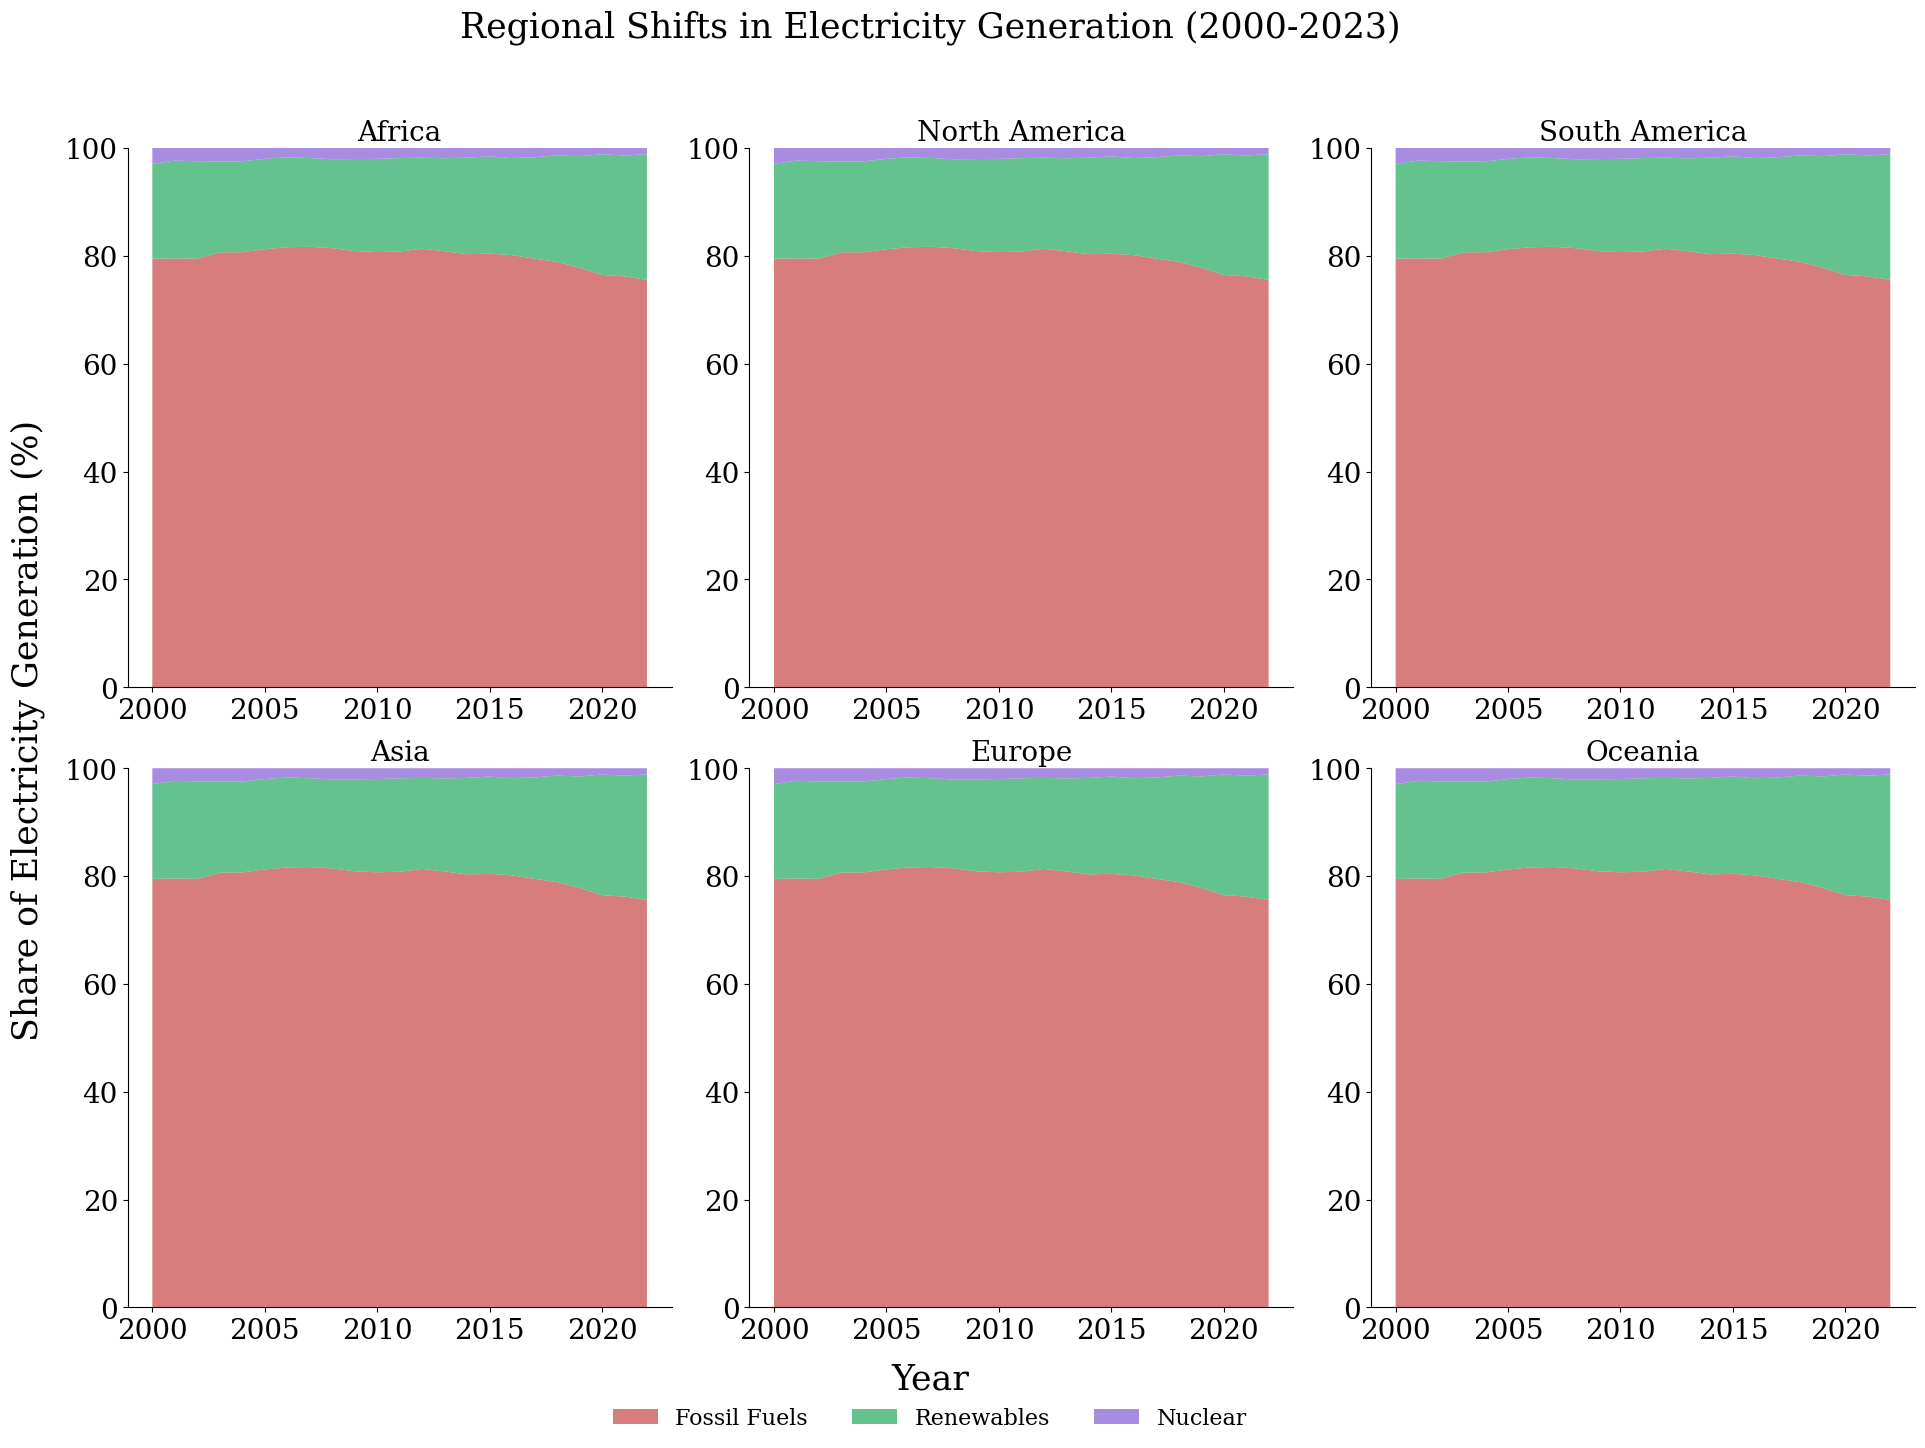

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle("Regional Shifts in Electricity Generation (2000-2023)", fontsize=25)

axes = axes.flatten()



for i, region in enumerate(regions):

    # Get data for stacking
    years = df_region['Year'].values
    fossil = df_region['fossil_share_of_electricity__pct'].values
    renewable = df_region['renewable_share_of_electricity__pct'].values
    nuclear = df_region['nuclear_share_of_electricity__pct'].values
    
    # Create stacked area chart without labels (we'll add a common legend later)
    axes[i].stackplot(years, fossil, renewable, nuclear, colors=colors, alpha=0.8)
    

    axes[i].set_ylim(0, 100)

    axes[i].set_xlabel("", fontsize=10)
    axes[i].set_ylabel("", fontsize=10)
    
    axes[i].set_title(f"{region}", fontsize=20)

    # Remove top and right borders
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)


fig.legend(labels=labels, loc='lower center', ncol=3, fontsize=16, bbox_to_anchor=(0.5, 0.02))
fig.text(0.5, 0.06, 'Year', ha='center', fontsize=25)
fig.text(0.04, 0.5, 'Share of Electricity Generation (%)', va='center', rotation='vertical', fontsize=25)
plt.tight_layout(rect=[0.06, 0.08, 1, 0.95])

plt.show()



### Evaluation on Electricity Generation Sources' Distribution

In [13]:
df_sources = pd.read_csv("https://ourworldindata.org/grapher/electricity-prod-source-stacked.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
print(df_sources.head())

          Entity Code  Year  \
0  ASEAN (Ember)  NaN  2000   
1  ASEAN (Ember)  NaN  2001   
2  ASEAN (Ember)  NaN  2002   
3  ASEAN (Ember)  NaN  2003   
4  ASEAN (Ember)  NaN  2004   

   other_renewables_excluding_bioenergy_generation__twh_chart_electricity_prod_source_stacked  \
0                                              16.93                                            
1                                              16.40                                            
2                                              16.61                                            
3                                              15.74                                            
4                                              16.57                                            

   bioenergy_generation__twh_chart_electricity_prod_source_stacked  \
0                                               5.87                 
1                                               6.46                 
2                   

In [14]:
# Data Preparation

regions = ["Africa", "North America", "South America", "Asia", "Europe", "Oceania"]
latest_year = 2022

# Filter to latest year and relevant regions
df_sources_latest = df_sources[(df_sources['Entity'].isin(regions)) & (df_sources['Year'] == latest_year)].copy()

print(df_sources_latest.head())

#Define energy sources mapping
energy_map = {
    'Coal': 'coal_generation__twh_chart_electricity_prod_source_stacked',
    'Gas': 'gas_generation__twh_chart_electricity_prod_source_stacked',
    'Oil': 'oil_generation__twh_chart_electricity_prod_source_stacked',
    'Nuclear': 'nuclear_generation__twh_chart_electricity_prod_source_stacked',
    'Hydro': 'hydro_generation__twh_chart_electricity_prod_source_stacked',
    'Wind': 'wind_generation__twh_chart_electricity_prod_source_stacked',
    'Solar': 'solar_generation__twh_chart_electricity_prod_source_stacked',
    'Bioenergy': 'bioenergy_generation__twh_chart_electricity_prod_source_stacked',
    'Other Renewables': 'other_renewables_excluding_bioenergy_generation__twh_chart_electricity_prod_source_stacked'
}

# Define color map that groups renewable and non-renewable sources
source_colors = {
    # Non-renewables - shades of brown/gray
    'Coal': '#8B4513',       # Dark brown
    'Gas': '#A0522D',        # Sienna brown
    'Oil': '#CD5C5C',        # Indian red
    
    # Nuclear - unique color
    'Nuclear': '#9370DB',    # Medium purple
    
    # Renewables - shades of blue/green
    'Hydro': '#4682B4',      # Steel blue
    'Wind': '#3CB371',       # Medium sea green
    'Solar': '#FFD700',      # Gold (yellow for sun)
    'Bioenergy': '#6B8E23',  # Olive green
    'Other Renewables': '#20B2AA'  # Light sea green
}

             Entity Code  Year  \
84           Africa  NaN  2022   
385            Asia  NaN  2022   
1934         Europe  NaN  2022   
4294  North America  NaN  2022   
4534        Oceania  NaN  2022   

      other_renewables_excluding_bioenergy_generation__twh_chart_electricity_prod_source_stacked  \
84                                                 5.52                                            
385                                               38.40                                            
1934                                              13.96                                            
4294                                              22.64                                            
4534                                               8.22                                            

      bioenergy_generation__twh_chart_electricity_prod_source_stacked  \
84                                                 2.80                 
385                                             

#### Visualization on Electricity Generation Sources by Region (2022)

Using small multiples for observing regional patterns

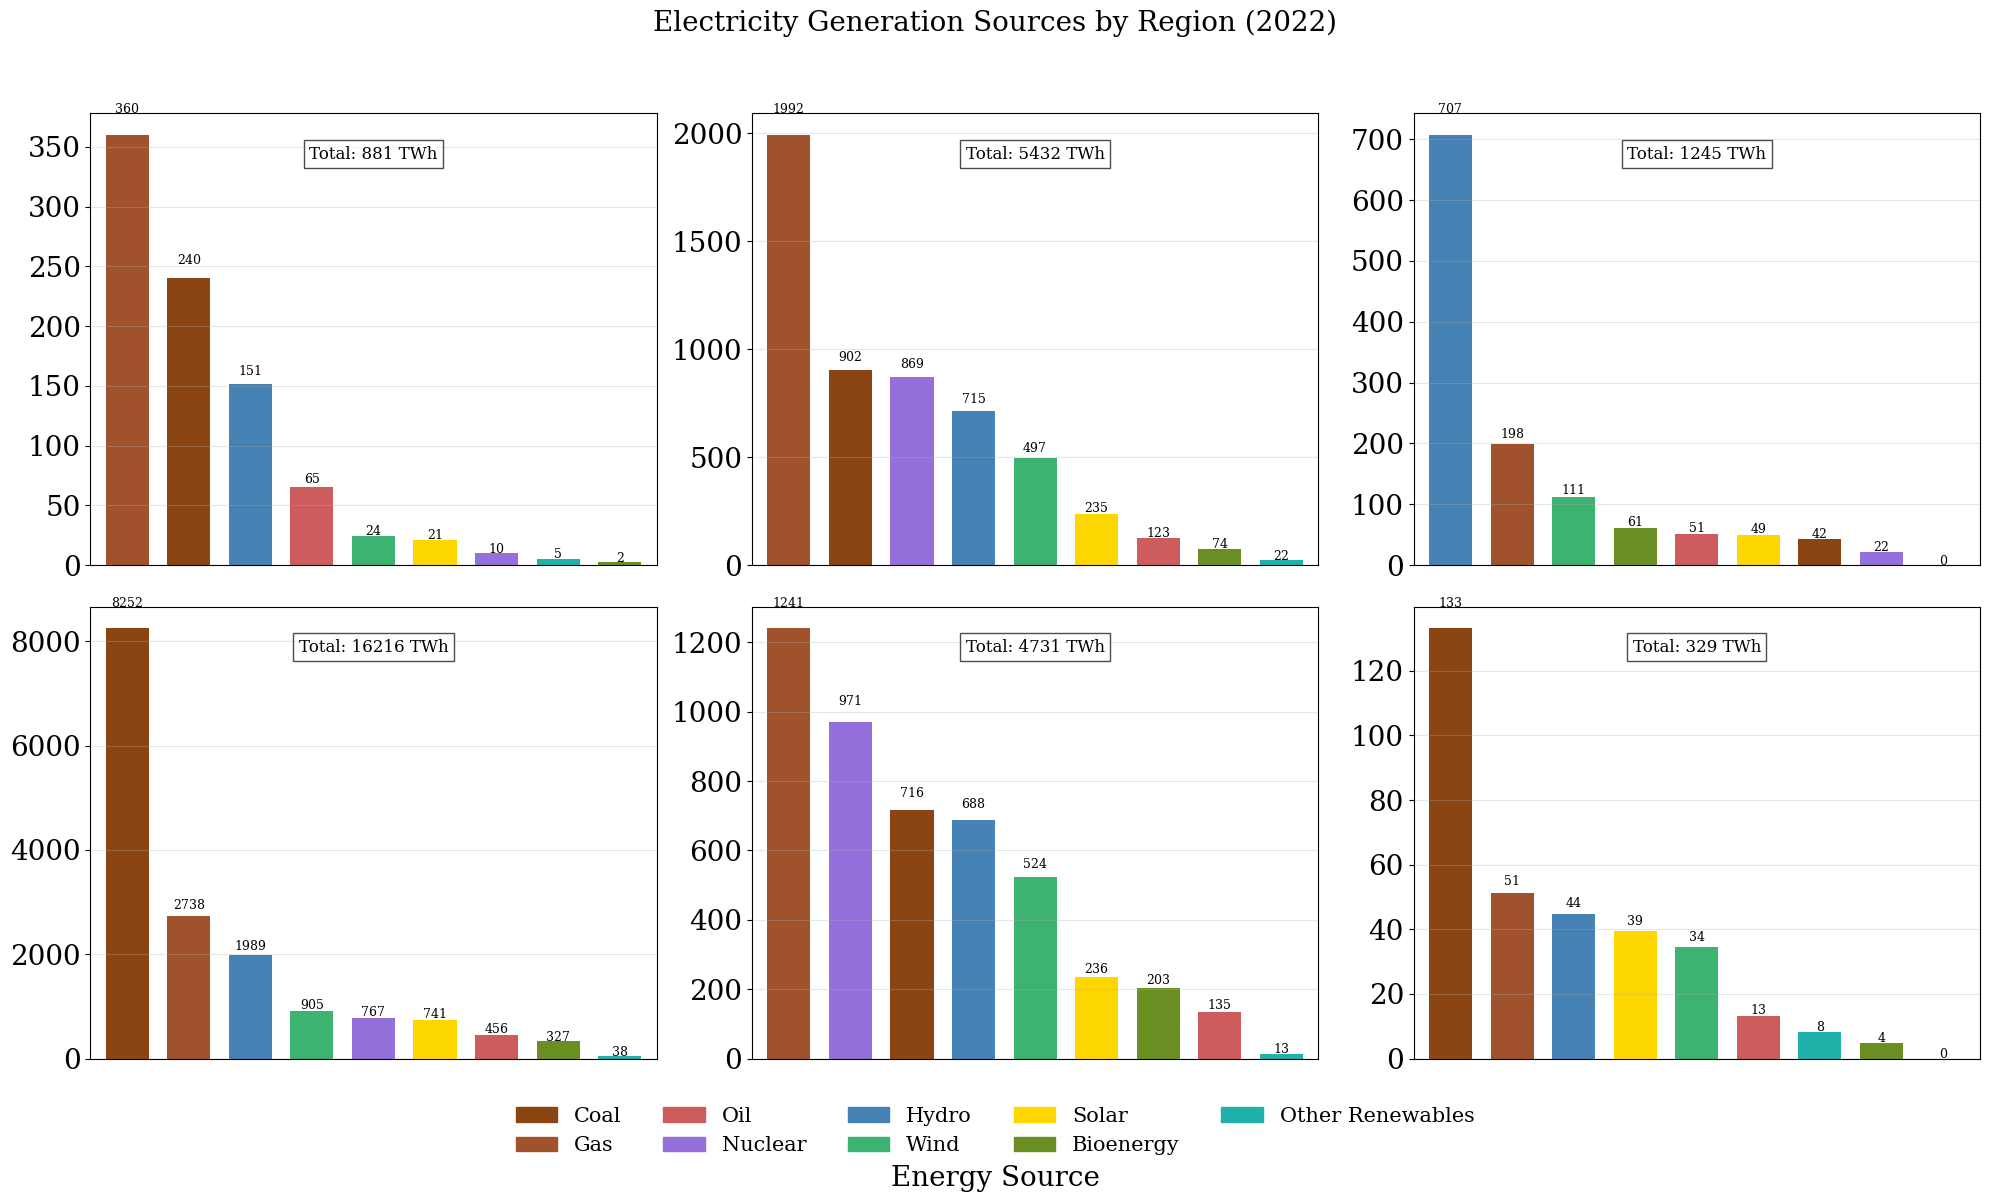

In [15]:
# Create plotting dataframe
plot_df = df_sources_latest[['Entity'] + list(energy_map.values())]
plot_df.columns = ['Region'] + list(energy_map.keys())
plot_df.set_index('Region', inplace=True)

# Create a figure with subplots - one for each region
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # 2 rows, 3 columns for 6 regions
fig.suptitle(f"Electricity Generation Sources by Region ({latest_year})", fontsize=20)

axes = axes.flatten()

# Create a bar chart for each region
for i, region in enumerate(regions):
    region_data = plot_df.loc[[region]].T
    
    region_data = region_data.sort_values(by=region, ascending=False)
    
    bars = region_data.plot(kind='bar', ax=axes[i], legend=False, width=0.7)
    
    for j, source in enumerate(region_data.index):
        bars.patches[j].set_facecolor(source_colors[source])
    
    for j, v in enumerate(region_data[region]):
        axes[i].text(j, v + (v*0.05), f"{int(v)}", ha='center', fontsize=9)
    
    axes[i].set_xticklabels([]) 
    axes[i].tick_params(axis='x', which='both', length=0) 
    
    axes[i].grid(axis='y', alpha=0.3)
    
    total = region_data[region].sum()
    axes[i].text(0.5, 0.9, f"Total: {int(total)} TWh", transform=axes[i].transAxes, 
                ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Create a grouped legend
fossil_patch = plt.Rectangle((0,0),1,1, color='#8B4513', label='Coal')
gas_patch = plt.Rectangle((0,0),1,1, color='#A0522D', label='Gas')
oil_patch = plt.Rectangle((0,0),1,1, color='#CD5C5C', label='Oil')
nuclear_patch = plt.Rectangle((0,0),1,1, color='#9370DB', label='Nuclear')
hydro_patch = plt.Rectangle((0,0),1,1, color='#4682B4', label='Hydro')
wind_patch = plt.Rectangle((0,0),1,1, color='#3CB371', label='Wind')
solar_patch = plt.Rectangle((0,0),1,1, color='#FFD700', label='Solar')
bio_patch = plt.Rectangle((0,0),1,1, color='#6B8E23', label='Bioenergy')
other_patch = plt.Rectangle((0,0),1,1, color='#20B2AA', label='Other Renewables')


fig.text(0.5, 0, "Energy Source", ha='center', fontsize=20)
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
handles = [fossil_patch, gas_patch, oil_patch, nuclear_patch, hydro_patch, wind_patch, solar_patch, bio_patch, other_patch]
fig.legend(handles=handles, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.01), fontsize=15)

plt.show()

### Observation of the relationship of four important variables to be considered together to assess progress toward SDG goal 7.

In [45]:
# Data Preparation

# 1. support-policies-climate dataset
df_support_climate_change = pd.read_csv("Dataset/support-policies-climate.csv")

# 2. share-of-the-population-with-access-to-electricity dataset
df_energy_intensity = pd.read_csv("Dataset/energy-intensity.csv")

# 3. co2-per-capita-vs-renewable-electricity dataset
df_co2_renewable = pd.read_csv("Dataset/co2-per-capita-vs-renewable-electricity.csv")

In [46]:
# Data Cleaning
df_support_climate_change = df_support_climate_change.drop('Year', axis=1)

df_energy_intensity = df_energy_intensity.drop('Year', axis=1)
df_energy_intensity = df_energy_intensity.drop('time', axis=1)

df_co2_renewable= df_co2_renewable.drop('Year', axis=1)
df_co2_renewable = df_co2_renewable.drop('time', axis=1)


# Data Merging
merged_df = pd.merge(df_support_climate_change, df_energy_intensity, on=['Entity', 'Code'], how='inner')
merged_df = pd.merge(merged_df, df_co2_renewable, on=['Entity', 'Code'], how='inner')

print(merged_df.columns.tolist())


merged_df = merged_df.rename(columns={
    "Support political action on climate": "Climate Support",
    "Primary energy consumption per GDP (kWh/$)": "Energy Intensity",
    "Annual CO₂ emissions (per capita)": "CO₂ per Capita",
    "Renewables - % electricity": "Renewables %"
})

merged_df


['Entity', 'Code', 'Support political action on climate', 'Primary energy consumption per GDP (kWh/$)', 'Annual CO₂ emissions (per capita)', 'Renewables - % electricity', 'World regions according to OWID']


,Entity,Code,Climate Support,Energy Intensity,CO₂ per Capita,Renewables %,World regions according to OWID
0,Algeria,DZA,75.3,1.222463,4.058238,0.771150,Africa
1,Armenia,ARM,70.0,1.399184,2.486933,26.567844,Asia
2,Australia,AUS,71.7,1.225471,14.669758,33.215137,Oceania
3,Austria,AUT,68.0,1.068972,6.783374,78.054474,Europe
4,Belgium,BEL,67.1,1.554425,7.645034,25.759508,Europe
...,...,...,...,...,...,...,...
57,United Kingdom,GBR,72.7,0.792519,4.603079,41.384280,Europe
58,United States,USA,67.9,1.359041,14.870761,22.350597,North America
59,Uruguay,URY,76.9,0.953071,2.306119,90.974970,South America
60,Venezuela,VEN,76.6,4.356721,3.101923,77.699030,South America


### Visualizing of High-Dimensional Data 

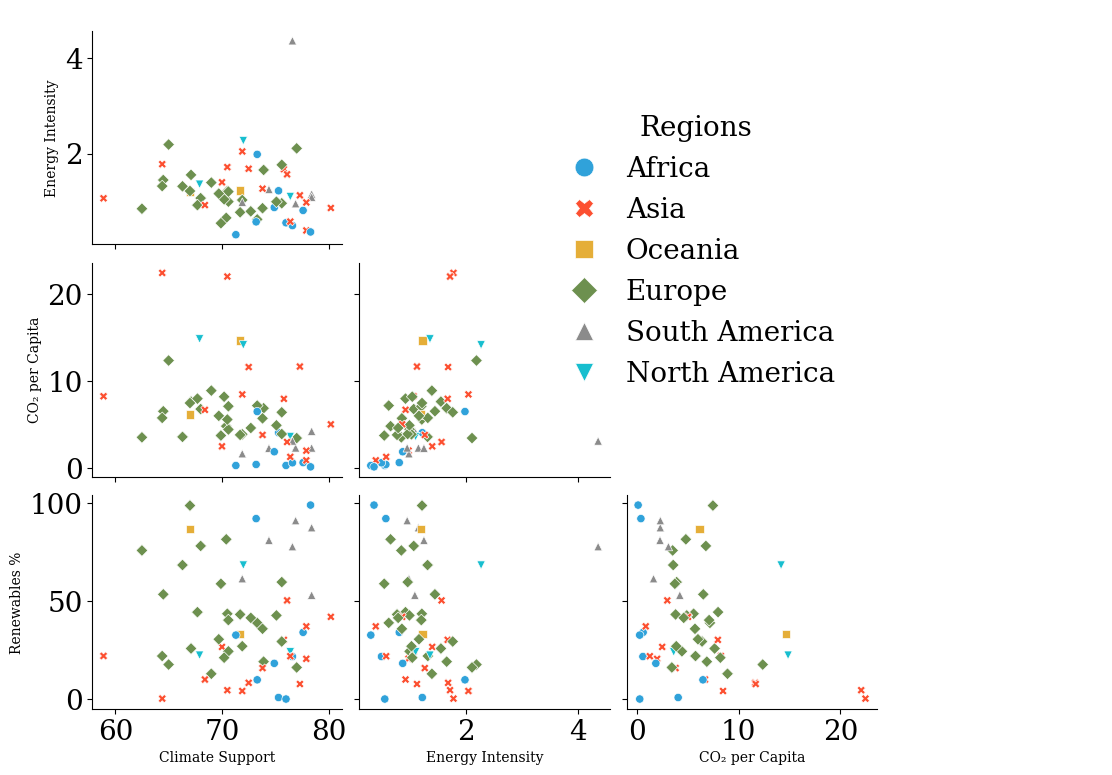

In [47]:
# Set plot parameters
plt.rcParams["legend.markerscale"] = 0.6 
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["legend.handletextpad"] = 0.5
plt.rcParams["legend.borderaxespad"] = 0
plt.rcParams["legend.borderpad"] = 0
plt.rcParams["axes.labelsize"] = 10  


fig = sns.pairplot(
    merged_df,
    vars=plot_vars,
    hue="World regions according to OWID",
    palette=cc.glasbey_hv[:len(merged_df["World regions according to OWID"].unique())],
    markers=["o", "X", "s", "D", "^", "v"],
    aspect=1.2, 
    corner=True,  
    diag_kind=None 
)

axes = fig.axes
for i, var_i in enumerate(plot_vars):
    for j, var_j in enumerate(plot_vars):
        if i > j: 
            if var_j == "Support political action on climate":
                axes[i, j].set_xlim(50, 90)
            elif var_j == "Primary energy consumption per GDP(kWh/$)":
                axes[i, j].set_xlim(40, 100)
            elif var_j == "Annual CO₂ emissions (per capita)":
                axes[i, j].set_xlim(0, 25)
            elif var_j == "Renewables - % electricity":
                axes[i, j].set_xlim(0, 100)

            if var_i == "Support political action on climate":
                axes[i, j].set_ylim(50, 90)
            elif var_i == "Primary energy consumption per GDP(kWh/$)":
                axes[i, j].set_ylim(40, 100)
            elif var_i == "Annual CO₂ emissions (per capita)":
                axes[i, j].set_ylim(0, 25)
            elif var_i == "Renewables - % electricity":
                axes[i, j].set_ylim(0, 100)

# Remove diagonal plots
for i, ax in enumerate(axes):
    for j, ax_j in enumerate(ax):
        if i == j:
            ax_j.remove()

sns.move_legend(fig, loc=(0.5, 0.5), title="Regions")
